# Baseline Model With Logistic Regression

## Import Modules

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import re

## Load Data

In [80]:
data = pd.read_csv('used_car_sales.csv')
data.head()

ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6       RWD  
3        Coupe             8       RWD  
4        Coupe             6       AWD

## Data Analysis & Prepocessing

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
dtypes: int64(6), object(7)
memory usage: 12.1+ MB


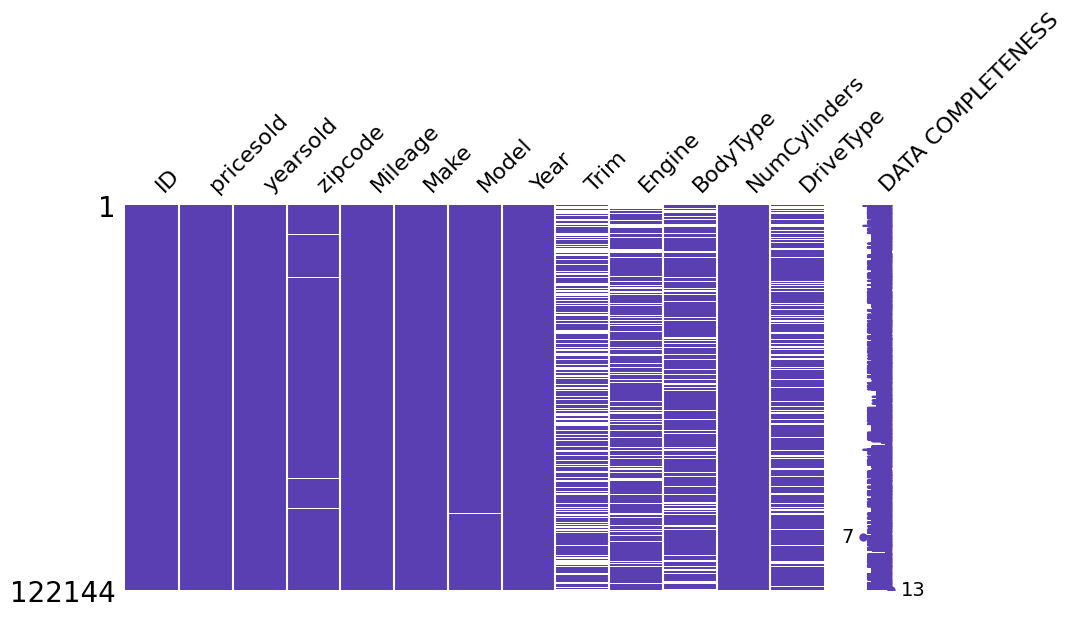

In [82]:
# visualize missing value
def plot_missing(df):
    import missingno as msno
    data=df.copy()
    msno.matrix(data, figsize=(10,5), color=(0.355,0.25,0.7),labels=True)
    plt.show()  

plot_missing(data)

In [83]:
# percentage of missing values
data.isnull().mean() * 100

ID               0.000000
pricesold        0.000000
yearsold         0.000000
zipcode          0.744204
Mileage          0.000000
Make             0.000000
Model            0.469118
Year             0.000000
Trim            40.054362
Engine          22.185289
BodyType        17.017619
NumCylinders     0.000000
DriveType       20.345658
dtype: float64

In [84]:
# redundant check
# Identify rows with duplicate IDs (excluding the first occurrence)
redundant_rows = data[data.duplicated(subset='ID', keep='first')]
redundant_rows


Empty DataFrame
Columns: [ID, pricesold, yearsold, zipcode, Mileage, Make, Model, Year, Trim, Engine, BodyType, NumCylinders, DriveType]
Index: []

In [85]:
# the output of the previous code cell means the data are non-redundant
# Drop the "ID", "yearsold" and "Trim" columns from the dataset, "Trim" has too many missing values
data = data.drop(columns=['ID', 'Trim', 'yearsold'])
data.head()

pricesold zipcode  Mileage               Make               Model  Year  \
0       7500   786**    84430               Ford             Mustang  1988   
1      15000   81006        0  Replica/Kit Makes  Jaguar Beck Lister  1958   
2       8750   33449    55000             Jaguar                 XJS  1995   
3      11600   07852    97200               Ford             Mustang  1968   
4      44000   07728    40703            Porsche                 911  2002   

                    Engine     BodyType  NumCylinders DriveType  
0              5.0L Gas V8        Sedan             0       RWD  
1        383 Fuel injected  Convertible             8       RWD  
2  4.0L In-Line 6 Cylinder  Convertible             6       RWD  
3           289 cu. in. V8        Coupe             8       RWD  
4                     3.6L        Coupe             6       AWD

In [86]:
# Drop rows with empty values
data = data.dropna(subset=['Engine', 'DriveType','BodyType','zipcode','Model'])
data.head()


pricesold zipcode  Mileage               Make               Model  Year  \
0       7500   786**    84430               Ford             Mustang  1988   
1      15000   81006        0  Replica/Kit Makes  Jaguar Beck Lister  1958   
2       8750   33449    55000             Jaguar                 XJS  1995   
3      11600   07852    97200               Ford             Mustang  1968   
4      44000   07728    40703            Porsche                 911  2002   

                    Engine     BodyType  NumCylinders DriveType  
0              5.0L Gas V8        Sedan             0       RWD  
1        383 Fuel injected  Convertible             8       RWD  
2  4.0L In-Line 6 Cylinder  Convertible             6       RWD  
3           289 cu. in. V8        Coupe             8       RWD  
4                     3.6L        Coupe             6       AWD

In [87]:
# Filter the dataset to keep rows where "Year" is within 1900 and 2024
data = data[(data['Year'] >= 1900) & (data['Year'] <= 2024)]


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79486 entries, 0 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     79486 non-null  int64 
 1   zipcode       79486 non-null  object
 2   Mileage       79486 non-null  int64 
 3   Make          79486 non-null  object
 4   Model         79486 non-null  object
 5   Year          79486 non-null  int64 
 6   Engine        79486 non-null  object
 7   BodyType      79486 non-null  object
 8   NumCylinders  79486 non-null  int64 
 9   DriveType     79486 non-null  object
dtypes: int64(4), object(6)
memory usage: 6.7+ MB


In [89]:
# Filter out unrealistic mileage values (e.g., above 300,000 miles)
data = data[(data['Mileage'] >= 0) & (data['Mileage'] <= 600000)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78560 entries, 0 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     78560 non-null  int64 
 1   zipcode       78560 non-null  object
 2   Mileage       78560 non-null  int64 
 3   Make          78560 non-null  object
 4   Model         78560 non-null  object
 5   Year          78560 non-null  int64 
 6   Engine        78560 non-null  object
 7   BodyType      78560 non-null  object
 8   NumCylinders  78560 non-null  int64 
 9   DriveType     78560 non-null  object
dtypes: int64(4), object(6)
memory usage: 6.6+ MB


In [90]:
# Retain only rows with zipcodes containing only numbers
data = data[data['zipcode'].astype(str).str.fullmatch(r'\d+')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53859 entries, 1 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     53859 non-null  int64 
 1   zipcode       53859 non-null  object
 2   Mileage       53859 non-null  int64 
 3   Make          53859 non-null  object
 4   Model         53859 non-null  object
 5   Year          53859 non-null  int64 
 6   Engine        53859 non-null  object
 7   BodyType      53859 non-null  object
 8   NumCylinders  53859 non-null  int64 
 9   DriveType     53859 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.5+ MB


In [91]:
# Filter out unrealistic price values
data = data[(data['pricesold'] > 0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53851 entries, 1 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     53851 non-null  int64 
 1   zipcode       53851 non-null  object
 2   Mileage       53851 non-null  int64 
 3   Make          53851 non-null  object
 4   Model         53851 non-null  object
 5   Year          53851 non-null  int64 
 6   Engine        53851 non-null  object
 7   BodyType      53851 non-null  object
 8   NumCylinders  53851 non-null  int64 
 9   DriveType     53851 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.5+ MB


In [92]:
# convert the values into lowercase to avoid redundancy. For example, "CHROVELET" and "chrovelet" should mean the same thing
def convert_lowercase(column_list):
    for column in column_list:
        data[column] = data[column].str.lower()
column_list = ['zipcode', 'Make', 'Model', 'Engine', 'BodyType', 'DriveType']
convert_lowercase(column_list)
data.head()
    

pricesold zipcode  Mileage               Make               Model  Year  \
1       15000   81006        0  replica/kit makes  jaguar beck lister  1958   
2        8750   33449    55000             jaguar                 xjs  1995   
3       11600   07852    97200               ford             mustang  1968   
4       44000   07728    40703            porsche                 911  2002   
11      14100   07014   109500               jeep            wrangler  2012   

                     Engine     BodyType  NumCylinders DriveType  
1         383 fuel injected  convertible             8       rwd  
2   4.0l in-line 6 cylinder  convertible             6       rwd  
3            289 cu. in. v8        coupe             8       rwd  
4                      3.6l        coupe             6       awd  
11                     3.6l          suv             6       4wd

Frequency Count for values in each feature

In [93]:
# Print out all unique values in the "Engine" column
drivetype_freq = data['DriveType'].value_counts()
engine_freq = data['Engine'].value_counts()
print(engine_freq)
print("----------------------")
print("\n")
print(drivetype_freq)
print("----------------------")
# print(zipcode_freq)



v8                         1301
350                        1022
v6                          751
5.0                         390
5.7                         348
                           ... 
5 liter v8 s62 m engine       1
5.7   v-8                     1
v8 6.2 l 427 horsepower       1
2.7 l flat six                1
m52tu 2.8l                    1
Name: Engine, Length: 13482, dtype: int64
----------------------


rwd                                        22278
4wd                                        10784
fwd                                        10126
awd                                         5385
--                                           371
                                           ...  
awd-lockable differential traction mode        1
dts                                            1
8                                              1
2dr roadster w/tiptronic                       1
4wd-3.73 limited slip axle                     1
Name: DriveType, Length: 1930, dtype: int6

In [94]:
# Print out all unique values in the "Engine" column
year_freq = data['Year'].value_counts()

print(year_freq)
print("----------------------")


2006    2238
2007    2139
2004    2139
2005    2114
2008    1971
        ... 
1914       1
1913       1
1916       1
1943       1
1901       1
Name: Year, Length: 108, dtype: int64
----------------------


In [95]:
# Print out all unique values in the "Engine" column
make_freq = data['Make'].value_counts()
print(make_freq)
print("----------------------")

ford                       9715
chevrolet                  8725
toyota                     3120
mercedes-benz              2760
dodge                      2653
                           ... 
vpg                           1
wheego whip electra car       1
mercedes                      1
divco                         1
london taxi                   1
Name: Make, Length: 247, dtype: int64
----------------------


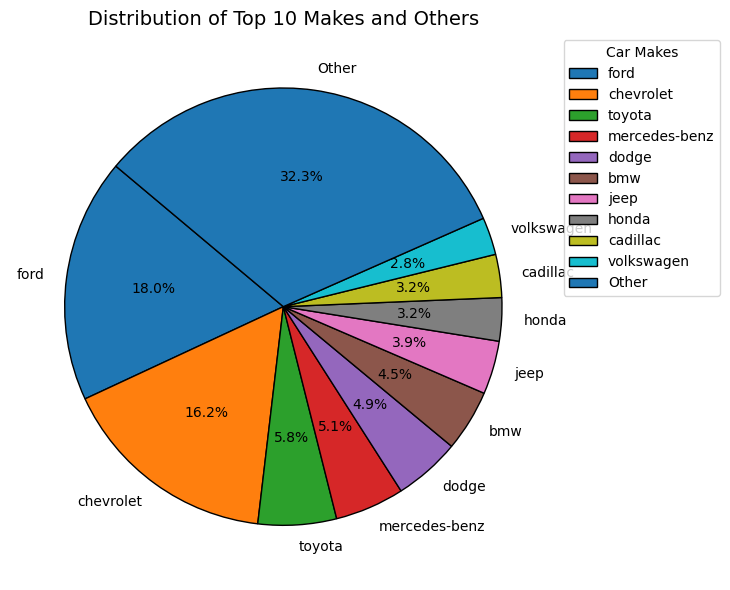

In [96]:
# Get the top 10 most frequent "Make" values
top_10_makes = data['Make'].value_counts().nlargest(10)

# Group the rest of the makes as "Other"
other_count = data['Make'].value_counts().sum() - top_10_makes.sum()
top_10_makes['Other'] = other_count

# Plot a pie chart
plt.figure(figsize=(8, 6))  # Resize the overall figure
wedges, texts, autotexts = plt.pie(
    top_10_makes, 
    labels=top_10_makes.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Add a legend outside the chart in the top-right corner
plt.legend(
    wedges, 
    top_10_makes.index, 
    title="Car Makes", 
    loc="upper left", 
    bbox_to_anchor=(1, 1)  # Fine-tune the legend position outside the pie chart
)

# Add a title and adjust layout
plt.title('Distribution of Top 10 Makes and Others', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to prevent overlap
plt.show()


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53851 entries, 1 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     53851 non-null  int64 
 1   zipcode       53851 non-null  object
 2   Mileage       53851 non-null  int64 
 3   Make          53851 non-null  object
 4   Model         53851 non-null  object
 5   Year          53851 non-null  int64 
 6   Engine        53851 non-null  object
 7   BodyType      53851 non-null  object
 8   NumCylinders  53851 non-null  int64 
 9   DriveType     53851 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.5+ MB


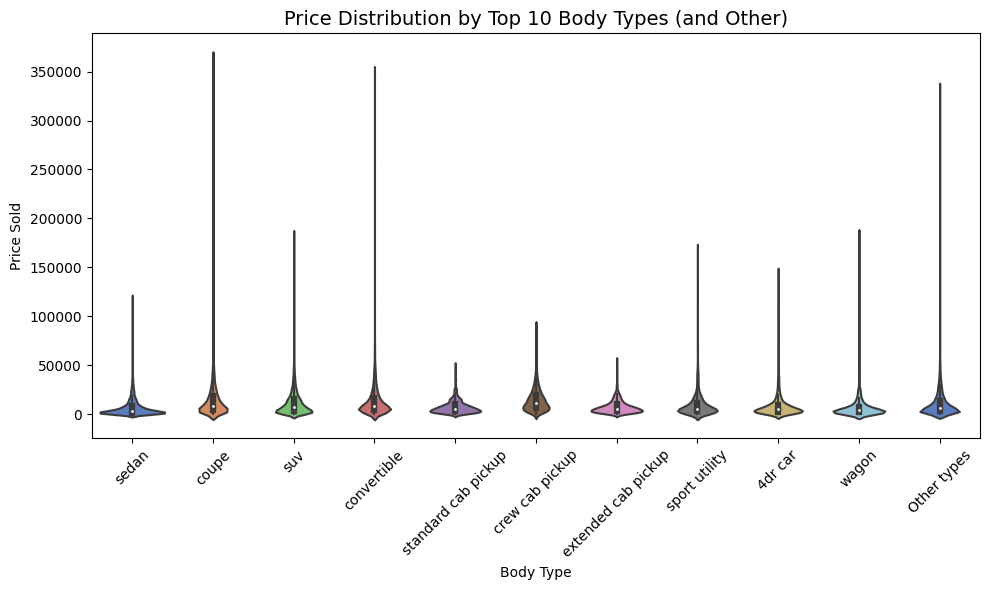

In [98]:
import seaborn as sns
# Step 1: Identify top 10 BodyType categories
top_10_bodytypes = data['BodyType'].value_counts().nlargest(10).index

# Step 2: Replace non-top 10 categories with 'rest'
data['BodyType_filtered'] = data['BodyType'].apply(lambda x: x if x in top_10_bodytypes else 'Other types')

# Step 3: Set the order of the BodyType categories (with 'rest' at the end)
bodytype_order = list(top_10_bodytypes) + ['Other types']

# Step 4: Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='BodyType_filtered', y='pricesold', data=data, palette='muted', order=bodytype_order)
plt.title('Price Distribution by Top 10 Body Types (and Other)', fontsize=14)
plt.xlabel('Body Type')
plt.ylabel('Price Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()


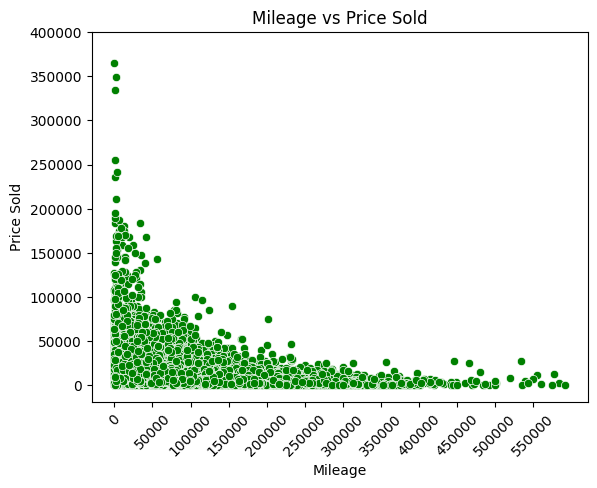

In [99]:
sns.scatterplot(x='Mileage', y='pricesold', data=data, color='green')
plt.title("Mileage vs Price Sold")
plt.xlabel("Mileage")
plt.ylabel("Price Sold")
plt.xticks(ticks=range(0, 600000, 50000), rotation=45)  # Adjust the range and step size as needed
plt.yticks(ticks=range(0, 450000, 50000))  # Adjust the range and step size as needed
plt.show()

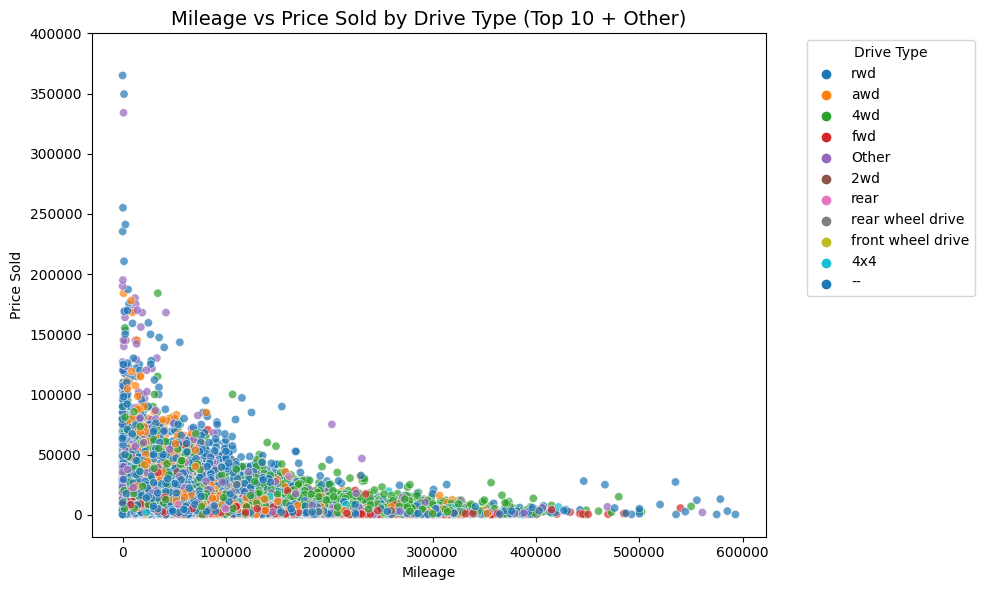

In [100]:
import seaborn as sns

# Step 1: Identify top 10 DriveType categories
top_10_drivetypes = data['DriveType'].value_counts().nlargest(10).index

# Step 2: Replace non-top 10 categories with 'Other'
data['DriveType_filtered'] = data['DriveType'].apply(lambda x: x if x in top_10_drivetypes else 'Other')

# Step 3: Plot a scatter plot with hue as DriveType
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='pricesold', hue='DriveType_filtered', data=data, palette='tab10', alpha=0.7)
plt.title("Mileage vs Price Sold by Drive Type (Top 10 + Other)", fontsize=14)
plt.xlabel("Mileage")
plt.ylabel("Price Sold")
plt.yticks(ticks=range(0, 450000, 50000))  # Adjust the range and step size as needed
plt.legend(title="Drive Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()

plt.show()

In [101]:
# Retain only rows with zipcodes containing only numbers
data_1 = data[data['zipcode'].astype(str).str.fullmatch(r'\d+')]
data_1.head()


pricesold zipcode  Mileage               Make               Model  Year  \
1       15000   81006        0  replica/kit makes  jaguar beck lister  1958   
2        8750   33449    55000             jaguar                 xjs  1995   
3       11600   07852    97200               ford             mustang  1968   
4       44000   07728    40703            porsche                 911  2002   
11      14100   07014   109500               jeep            wrangler  2012   

                     Engine     BodyType  NumCylinders DriveType  \
1         383 fuel injected  convertible             8       rwd   
2   4.0l in-line 6 cylinder  convertible             6       rwd   
3            289 cu. in. v8        coupe             8       rwd   
4                      3.6l        coupe             6       awd   
11                     3.6l          suv             6       4wd   

   BodyType_filtered DriveType_filtered  
1        convertible                rwd  
2        convertible                rwd  
3              coupe                rwd  
4              coupe                awd  
11               suv                4wd

Geographical density of used car sales

In [117]:
zipcode_freq = data_1['zipcode'].value_counts()
print(zipcode_freq)
print("----------------------")


92868    3327
48150    1126
77477     973
17319     563
19114     536
         ... 
15229       1
55340       1
06455       1
02675       1
44608       1
Name: zipcode, Length: 11377, dtype: int64
----------------------


In [40]:
# Print out all unique values in the "Engine" column
make_freq = data['Make'].value_counts()
print(make_freq)
print("----------------------")

ford                       9715
chevrolet                  8725
toyota                     3120
mercedes-benz              2760
dodge                      2653
                           ... 
vpg                           1
wheego whip electra car       1
mercedes                      1
divco                         1
london taxi                   1
Name: Make, Length: 247, dtype: int64
----------------------


In [118]:
import folium
from folium.plugins import HeatMap
import pgeocode

# Step 1: Geocode zip codes to latitude and longitude
nomi = pgeocode.Nominatim('us')  # Geocoder for US zip codes

# Function to get latitude and longitude for a given zip code
def get_lat_lon(zipcode):
    location = nomi.query_postal_code(zipcode)
    if pd.notnull(location.latitude) and pd.notnull(location.longitude):
        return location.latitude, location.longitude
    return None, None

# Extract latitude and longitude for each row
data_1[['latitude', 'longitude']] = data_1['zipcode'].astype(str).apply(
    lambda x: pd.Series(get_lat_lon(x))
)

# Step 2: Aggregate data and remove rows with missing coordinates
sales_density = data_1.dropna(subset=['latitude', 'longitude']).groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Step 3: Create a Folium Map
sales_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered on the US

# Step 4: Add a heatmap layer for car sales density
heat_data = [[row['latitude'], row['longitude'], row['count']] for index, row in sales_density.iterrows()]
HeatMap(heat_data, radius=10).add_to(sales_map)

# Save and display the map
sales_map.save('car_sales_density_map.html')
sales_map


/var/folders/11/6t76s5f5293639qxljpr6gvc0000gn/T/ipykernel_54075/1692605130.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[['latitude', 'longitude']] = data_1['zipcode'].astype(str).apply(
/var/folders/11/6t76s5f5293639qxljpr6gvc0000gn/T/ipykernel_54075/1692605130.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[['latitude', 'longitude']] = data_1['zipcode'].astype(str).apply(


In [119]:
import pandas as pd
import plotly.express as px
import pgeocode

# Geocode zip codes
nomi = pgeocode.Nominatim('us')
data_1[['latitude', 'longitude']] = data_1['zipcode'].astype(str).apply(
    lambda x: pd.Series(get_lat_lon(x))
)

# Drop rows with missing coordinates
data_1 = data_1.dropna(subset=['latitude', 'longitude'])

# Create a scatter_geo plot
fig = px.scatter_geo(data_1,
                     lat='latitude',
                     lon='longitude',
                     size_max=10,
                     title='Car Sales Density by Zip Code',
                     template='plotly',
                     hover_name='zipcode')

fig.show()


/var/folders/11/6t76s5f5293639qxljpr6gvc0000gn/T/ipykernel_54075/4164569513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[['latitude', 'longitude']] = data_1['zipcode'].astype(str).apply(


## Data Analysis (cont'd)

In [102]:
# Filter rows where "pricesold" equals 0
zero_price_rows = data[data['pricesold'] == 0]

# Display the filtered rows
zero_price_rows


Empty DataFrame
Columns: [pricesold, zipcode, Mileage, Make, Model, Year, Engine, BodyType, NumCylinders, DriveType, BodyType_filtered, DriveType_filtered]
Index: []

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53851 entries, 1 to 122143
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pricesold           53851 non-null  int64 
 1   zipcode             53851 non-null  object
 2   Mileage             53851 non-null  int64 
 3   Make                53851 non-null  object
 4   Model               53851 non-null  object
 5   Year                53851 non-null  int64 
 6   Engine              53851 non-null  object
 7   BodyType            53851 non-null  object
 8   NumCylinders        53851 non-null  int64 
 9   DriveType           53851 non-null  object
 10  BodyType_filtered   53851 non-null  object
 11  DriveType_filtered  53851 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.3+ MB


In [104]:
# Calculate the maximum and minimum value of "pricesold"
max_price = data['pricesold'].max()
min_price = data['pricesold'].min()

print(max_price, min_price)


365000 10


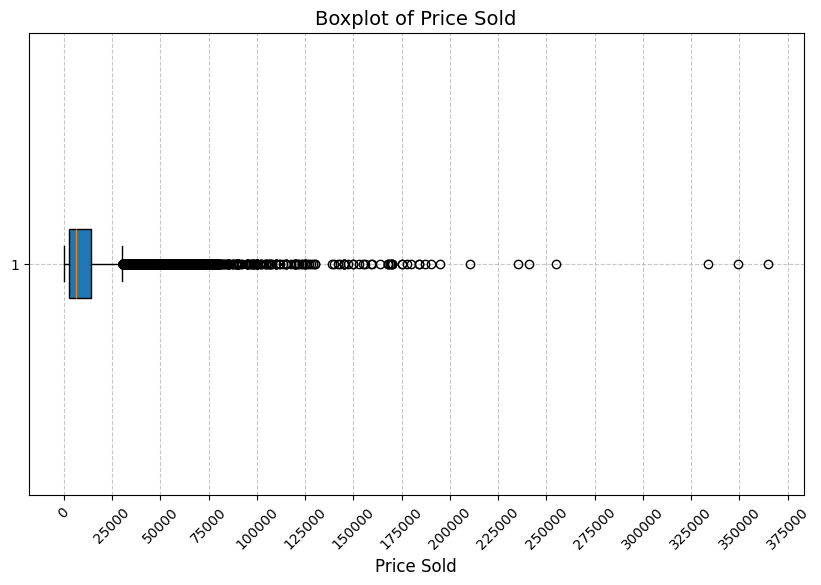

In [105]:
# Create a boxplot for the "pricesold" column
plt.figure(figsize=(10, 6))
plt.boxplot(data['pricesold'], vert=False, patch_artist=True)
plt.title('Boxplot of Price Sold', fontsize=14)
plt.xlabel('Price Sold', fontsize=12)

# Set x-axis ticks to be in increments of 25,000 and rotate them by 45 degrees
plt.xticks(range(0, int(data['pricesold'].max()) + 25000, 25000), rotation=45)

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


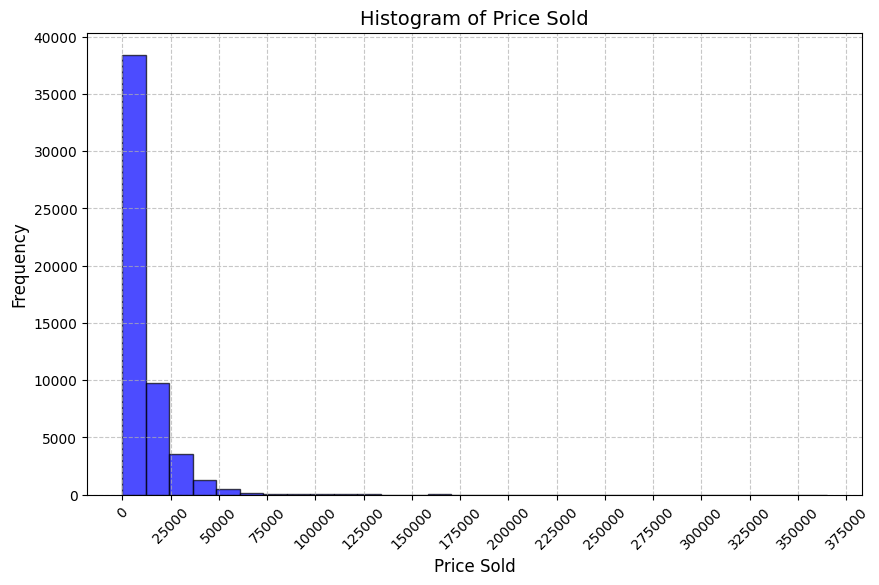

In [106]:
# Create a histogram for the "pricesold" column
plt.figure(figsize=(10, 6))
plt.hist(data['pricesold'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Price Sold', fontsize=14)
plt.xlabel('Price Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis ticks in increments of 10,000 and rotate them by 45 degrees
plt.xticks(range(0, int(data['pricesold'].max()) + 25000, 25000), rotation=45, fontsize=10)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


              pricesold   Mileage      Year  NumCylinders
pricesold      1.000000 -0.433271  0.033078      0.073099
Mileage       -0.433271  1.000000  0.151413     -0.041067
Year           0.033078  0.151413  1.000000     -0.174987
NumCylinders   0.073099 -0.041067 -0.174987      1.000000


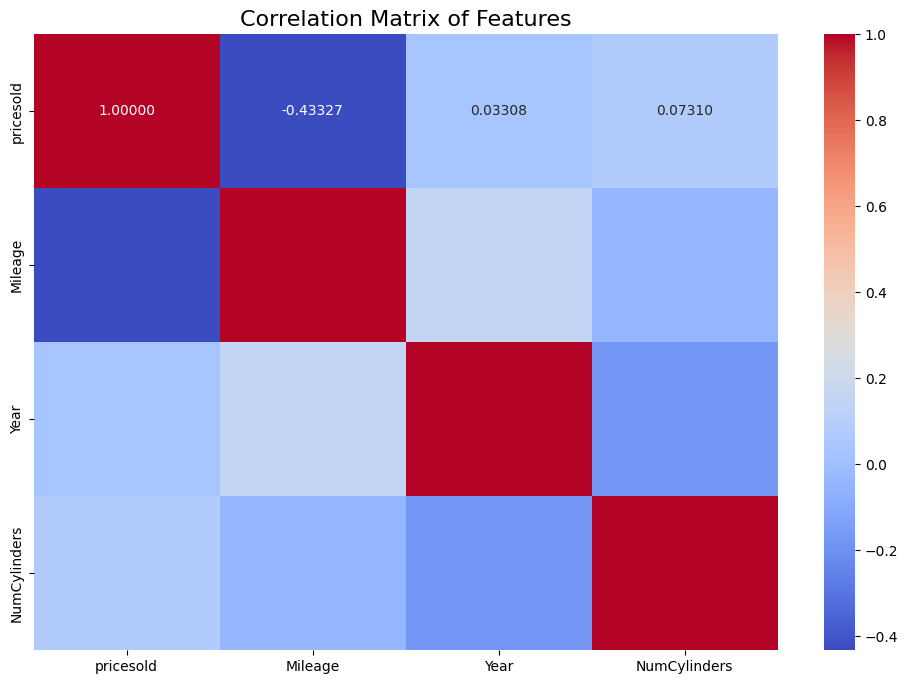

In [107]:
import seaborn as sns

# Compute the correlation matrix (only numerical columns)
correlation_matrix = data.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".5f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()




In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53851 entries, 1 to 122143
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pricesold           53851 non-null  int64 
 1   zipcode             53851 non-null  object
 2   Mileage             53851 non-null  int64 
 3   Make                53851 non-null  object
 4   Model               53851 non-null  object
 5   Year                53851 non-null  int64 
 6   Engine              53851 non-null  object
 7   BodyType            53851 non-null  object
 8   NumCylinders        53851 non-null  int64 
 9   DriveType           53851 non-null  object
 10  BodyType_filtered   53851 non-null  object
 11  DriveType_filtered  53851 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.3+ MB


In [109]:
data = data.drop(columns=['BodyType_filtered', 'DriveType_filtered'])

data.to_csv("used_car_preprecessed.csv", index=False)

## Model Training and Evaluation

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53851 entries, 1 to 122143
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pricesold     53851 non-null  int64 
 1   zipcode       53851 non-null  object
 2   Mileage       53851 non-null  int64 
 3   Make          53851 non-null  object
 4   Model         53851 non-null  object
 5   Year          53851 non-null  int64 
 6   Engine        53851 non-null  object
 7   BodyType      53851 non-null  object
 8   NumCylinders  53851 non-null  int64 
 9   DriveType     53851 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.5+ MB


In [134]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Target and feature selection
target = 'pricesold'
features = ['zipcode', 'Mileage', 'Make', 'Model', 'Year', 'Engine', 'BodyType', 'NumCylinders', 'DriveType']

X = data[features]
y = data[target]

# Preprocessing: encode categorical variables, including 'zipcode'
categorical_features = ['zipcode', 'Make', 'Model', 'Engine', 'BodyType', 'DriveType']
numerical_features = ['Mileage', 'Year', 'NumCylinders']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define parameter grid for GridSearchCV (though Linear Regression has fewer hyperparameters to tune)
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [None, 1, -1]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on both training and validation sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Output results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")

# Save predictions into a new DataFrame
X_val_preprocessed = best_model.named_steps['preprocessor'].transform(X_val)
output_df = pd.DataFrame(X_val, columns=features)
output_df['Actual Price'] = y_val
output_df['Predicted Price'] = y_val_pred

# Save predictions to a CSV file
output_file_path = 'used_car_predictions_rmse_lr.csv'
output_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to: {output_file_path}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=None; total time=   0.9s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=None; total time=   0.8s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=None; total time=   1.0s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=1; total time=   0.8s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=1; total time=   0.8s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=1; total time=   0.9s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=-1; total time=   0.8s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=-1; total time=   0.8s
[CV] END regressor__copy_X=True, regressor__fit_intercept=True, regressor__n_jobs=-1; total time

### XGBoost

In [136]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# Target and feature selection
target = 'pricesold'
features = ['zipcode', 'Mileage', 'Make', 'Model', 'Year', 'Engine', 'BodyType', 'NumCylinders', 'DriveType']

X = data[features]
y = data[target]

# Preprocessing: encode categorical variables, including 'zipcode'
categorical_features = ['zipcode', 'Make', 'Model', 'Engine', 'BodyType', 'DriveType']
numerical_features = ['Mileage', 'Year', 'NumCylinders']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with XGBoost Regressor
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on both training and validation sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Output results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")

# Save predictions into a new DataFrame
X_val_preprocessed = best_model.named_steps['preprocessor'].transform(X_val)
output_df = pd.DataFrame(X_val, columns=features)
output_df['Actual Price'] = y_val
output_df['Predicted Price'] = y_val_pred

# Save predictions to a CSV file
output_file_path = 'used_car_predictions_rmse_xgb.csv'
output_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to: {output_file_path}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.5s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.6s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.5s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=300; total time=   0.7s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=300; total time=   0.7s
[CV] END regressor__learning_rate=0.01, reg

### Neural Network

In [137]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np

# Target and feature selection
target = 'pricesold'
features = ['zipcode', 'Mileage', 'Make', 'Model', 'Year', 'Engine', 'BodyType', 'NumCylinders', 'DriveType']

X = data[features]
y = data[target]

# Preprocessing: encode categorical variables, including 'zipcode'
categorical_features = ['zipcode', 'Make', 'Model', 'Engine', 'BodyType', 'DriveType']
numerical_features = ['Mileage', 'Year', 'NumCylinders']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# # Preprocess the data
# X_preprocessed = preprocessor.fit_transform(X)

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

X_train_orig, X_val_orig, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess X_train and X_val using the preprocessor
X_train = preprocessor.fit_transform(X_train_orig)
X_val = preprocessor.transform(X_val_orig)

# Define a neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=128, verbose=1)

# Predict on both training and validation sets
y_train_pred = model.predict(X_train).flatten()
y_val_pred = model.predict(X_val).flatten()

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Output results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")

Epoch 1/25


/Users/yangliang/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 250221824.0000 - mse: 250221824.0000 - val_loss: 107973128.0000 - val_mse: 107973128.0000
Epoch 2/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 117249456.0000 - mse: 117249456.0000 - val_loss: 89028264.0000 - val_mse: 89028264.0000
Epoch 3/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 93960600.0000 - mse: 93960600.0000 - val_loss: 78643384.0000 - val_mse: 78643384.0000
Epoch 4/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 81026848.0000 - mse: 81026848.0000 - val_loss: 72020264.0000 - val_mse: 72020264.0000
Epoch 5/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 63830772.0000 - mse: 63830772.0000 - val_loss: 67657584.0000 - val_mse: 67657584.0000
Epoch 6/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 55288900.0000 - mse: 55288900.0000 - val_loss: 64381128.0000 - val_mse: 64381128.0000
Epoch 7/25
337/337 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 48889692.0000 - mse: 48889692.0000 - val_loss: 62162848.0000 -

In [138]:
output_df = pd.DataFrame(X_val_orig, columns=features)
output_df['Actual Price'] = y_val
output_df['Predicted Price'] = y_val_pred
# Save predictions to a CSV file
output_file_path = 'used_car_predictions_rmse_nn.csv'
output_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to: {output_file_path}")
output_df.info()

Predictions saved to: used_car_predictions_rmse_nn.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10771 entries, 67564 to 5551
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zipcode          10771 non-null  object 
 1   Mileage          10771 non-null  int64  
 2   Make             10771 non-null  object 
 3   Model            10771 non-null  object 
 4   Year             10771 non-null  int64  
 5   Engine           10771 non-null  object 
 6   BodyType         10771 non-null  object 
 7   NumCylinders     10771 non-null  int64  
 8   DriveType        10771 non-null  object 
 9   Actual Price     10771 non-null  int64  
 10  Predicted Price  10771 non-null  float32
dtypes: float32(1), int64(4), object(6)
memory usage: 967.7+ KB
